<a href="https://colab.research.google.com/github/MohammadAhmadSiddiqui/Capgemini-Training-/blob/main/Question_14_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Scenario Question: Predicting Titanic Survival

Researchers are studying the Titanic disaster and want to build models that predict whether a
  passenger would survive or not survive based on their information.
 - Features used:
 - Passenger class (pclass)
 - Gender (sex)
 - Age (age)
 - Number of siblings/spouses aboard (sibsp)
 - Number of parents/children aboard (parch)
- Ticket fare (fare)
- Label:
 - 1 = Survived
 - 0 = Died
 The researchers train three different models:
 - Logistic Regression
 - K-Nearest Neighbors (KNN) with k=5
 - Decision Tree with max depth = 4

They then evaluate each model using a classification report (precision, recall, F1-score, accuracy).

 ❓ Questions for Learners
 - Which model performs best at predicting survival, and why?
 - How does Logistic Regression differ from Decision Tree in terms of interpretability?
 - Why is scaling applied before training Logistic Regression and KNN, but not strictly needed for Decision Trees?
- Looking at the classification report, what do precision and recall mean in the context of survival predictions?
- Precision → Of those predicted to survive, how many actually survived?
- Recall → Of all who truly survived, how many were correctly predicted?
- If you were a historian, which model would you trust more to explain survival patterns, and why?

Use the below pre-loaded dataset:

 1. Load data (use seaborn's built-in dataset)
import seaborn as sns
df = sns.load_dataset('titanic')

In [3]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Load Dataset
df=sns.load_dataset('titanic')

# Select Required Columns
df=df[['pclass','sex','age','sibsp','parch','fare','survived']]

# Handle Missing Values
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())

#  Convert Categorical to Numerical
df['sex']=df['sex'].map({'male':0,'female':1})

#  Define Features & Label
X=df.drop('survived',axis=1)
y=df['survived']

#  Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

# Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Model 1: Logistic Regression

log_model=LogisticRegression()
log_model.fit(X_train_scaled,y_train)

log_pred=log_model.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:",accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))

# Model 2: KNN (k=5)

knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled,y_train)

knn_pred=knn_model.predict(X_test_scaled)

print("KNN (k=5):")
print("Accuracy:",accuracy_score(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

# Model 3: Decision Tree (max_depth=4)

tree_model=DecisionTreeClassifier(max_depth=4,random_state=42)
tree_model.fit(X_train,y_train)

tree_pred=tree_model.predict(X_test)

print("Decision Tree (depth=4)")
print("Accuracy:", accuracy_score(y_test, tree_pred))
print(classification_report(y_test,tree_pred))



Logistic Regression:
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

KNN (k=5):
Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Decision Tree (depth=4)
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           

<Figure size 640x480 with 0 Axes>

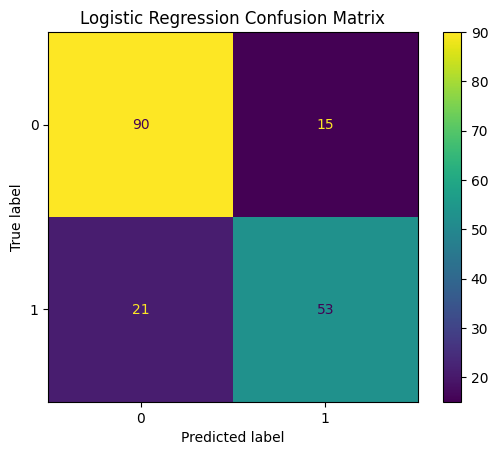

<Figure size 640x480 with 0 Axes>

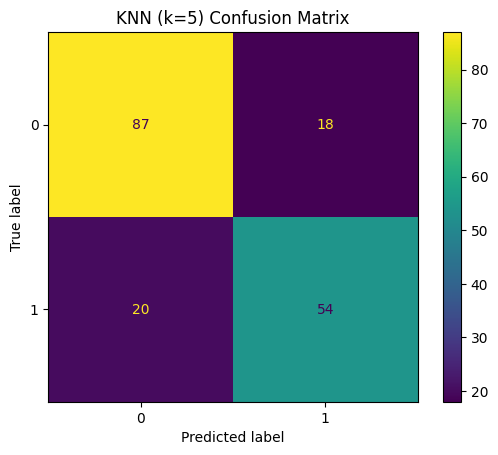

<Figure size 640x480 with 0 Axes>

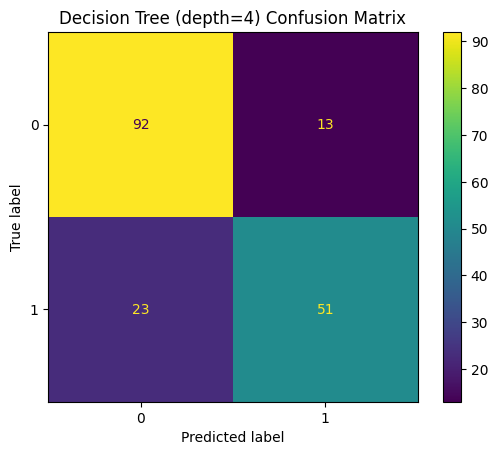

In [4]:
cm_log = confusion_matrix(y_test, log_pred)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log)
plt.figure()
disp_log.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()


cm_knn = confusion_matrix(y_test, knn_pred)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
plt.figure()
disp_knn.plot()
plt.title("KNN (k=5) Confusion Matrix")
plt.show()


cm_tree = confusion_matrix(y_test, tree_pred)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
plt.figure()
disp_tree.plot()
plt.title("Decision Tree (depth=4) Confusion Matrix")
plt.show()